In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data.to_numpy() / 255.0, mnist.target.to_numpy()

X, y

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [5]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Reshape the images to 28x28 pixels
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

In [7]:
# Flatten the images to 1D arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [8]:
# Create an instance of the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [9]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [11]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.08%


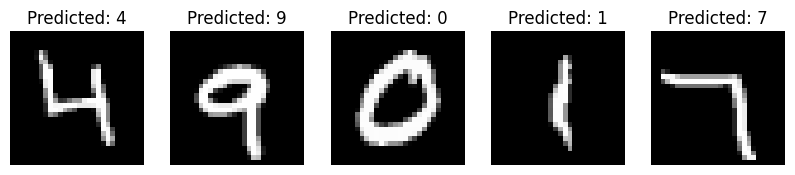

In [12]:
# Plot some sample images and their predictions
n_samples = 5
fig, axes = plt.subplots(nrows=1, ncols=n_samples, figsize=(10, 3))

for ax, idx in zip(axes, np.random.randint(0, len(X_test), n_samples)):
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"Predicted: {y_pred[idx]}")
    ax.axis('off')

plt.show()